In [2]:
#stuff from Ted

import tensorflow as tf
from tensorflow.keras import datasets, layers, models, metrics, Model
from tensorflow.keras.callbacks import Callback
#from data import load_image_h5
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import h5py
from tensorflow import reshape
import datetime
%load_ext tensorboard
print(tf.__version__)

2.2.0


In [3]:
dataset = h5py.File('simu_HDF_thistimeforReal.h5', 'r')
num_diodes = dataset['Num_diodes'][...]
x_pos = (dataset['Xpos'][...])/100
y_pos = (dataset['Ypos'][...])/100
histgrid = dataset['histgrid'][...]
output = np.vstack((x_pos,y_pos)) #define new, single variable for x and y position
output = np.transpose(output) #original definition was sideways, so we transposed it
dataset.close()

In [4]:
print(type(output))
print(np.where(output == -40))
print(output[334])

<class 'numpy.ndarray'>
(array([  8,  24,  40,  57,  74,  91, 108, 117, 118, 119, 120, 121, 122,
       123, 124, 125, 125, 126, 127, 128, 129, 130, 131, 132, 133, 142,
       158, 174, 190, 206, 222, 238, 254, 270, 286, 302, 318, 334]), array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))
[  8. -40.]


In [5]:
print(output[8])

[-12. -40.]


In [6]:
print(histgrid.shape)

(1001, 342, 132)


In [7]:
x_locat = np.where(output[:,0] == 8)
y_locat = np.where(output[:,1] == -40)

print(np.intersect1d(x_locat, y_locat))

[334]


In [10]:
print(test_histogram1)
print(type(test_histogram1))

[0.0, 0.0, 0.0, 0.0, 3.0, 2.0, 83.0, 129.0, 33.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
<class 'list'>


15
5


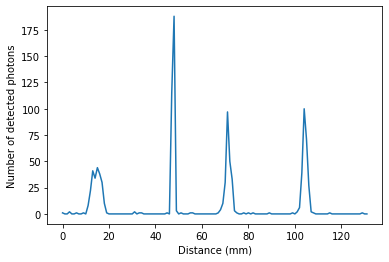

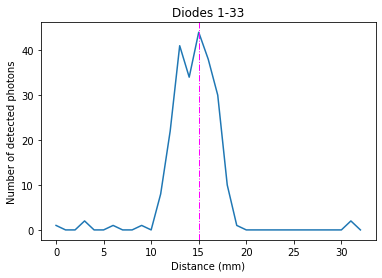

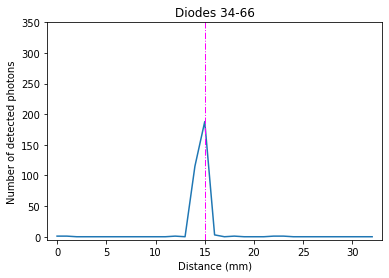

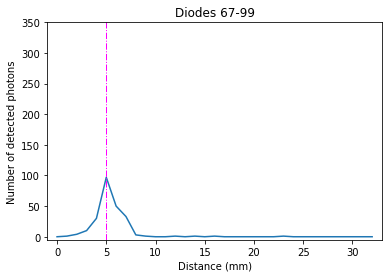

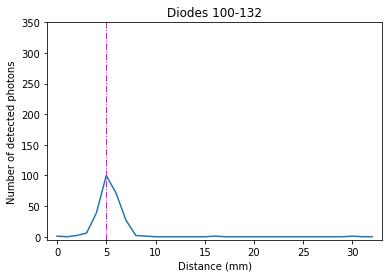

In [18]:
event_num = 673 #int between 0 and 1000
position = 139 #int between 0 and 341


#x and y at the "position;" the correct peak location
x_peak_value = round(((output[position][0]+48)/100)*33)
y_peak_value = round(((output[position][1]+48)/100)*33)

print(x_peak_value)
print(y_peak_value)
 
test_histogram = []
for i in range(132):
        test_histogram.append(histgrid[event_num][position][i])    
np.array(test_histogram)

#plt.axis([0, 132, 0, 160])
plt.xlabel('Distance (mm)')
plt.ylabel('Number of detected photons')
plt.plot(test_histogram)
plt.show()

test_histogram1 = []
for i in range(33):
    test_histogram1.append(histgrid[event_num][position][i])   
np.array(test_histogram1)

plt.title('Diodes 1-33')
plt.xlabel('Distance (mm)')
plt.ylabel('Number of detected photons')
#plt.axis([-1, 33, -5, 350])
plt.plot(test_histogram1)
plt.axvline(x = x_peak_value, color = "magenta", linewidth=1, linestyle='dashdot')
plt.show()

test_histogram2 = []
for i in range(33,66):
    test_histogram2.append(histgrid[event_num][position][i])     
np.array(test_histogram2)

plt.title('Diodes 34-66')
plt.xlabel('Distance (mm)')
plt.ylabel('Number of detected photons')
plt.axis([-1, 33, -5, 350])
plt.plot(test_histogram2)
plt.axvline(x = x_peak_value, color = "magenta", linewidth=1, linestyle='dashdot')
plt.show()

test_histogram3 = []
for i in range(66,99):
    test_histogram3.append(histgrid[event_num][position][i])     
np.array(test_histogram3)

plt.title('Diodes 67-99')
plt.xlabel('Distance (mm)')
plt.ylabel('Number of detected photons')
plt.axis([-1, 33, -5, 350])
plt.plot(test_histogram3)
plt.axvline(x = y_peak_value, color = "magenta", linewidth=1, linestyle='dashdot')
plt.show()

test_histogram4 = []
for i in range(99,132):
    test_histogram4.append(histgrid[event_num][position][i])    
np.array(test_histogram4)

plt.title('Diodes 100-132')
plt.xlabel('Distance (mm)')
plt.ylabel('Number of detected photons')
plt.axis([-1, 33, -5, 350])
plt.plot(test_histogram4)
plt.axvline(x = y_peak_value, color = "magenta", linewidth=1, linestyle='dashdot') 
plt.show()